
### Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it


In [17]:

# Import the essential libraries for data manipulation, visualization, and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set style for better visualization
sns.set_theme(style="whitegrid")

# Load the dataset and inspect the first few rows to understand the data structure
df = pd.read_csv('dataset.csv')
df.head(10)  # Displaying the first 10 rows to get a better feel for the data

# Understand the dataset - check data types, missing values, and overall structure
df.info()
print("\nChecking for missing values:\n", df.isnull().sum())

# Filling missing numerical values with median (more robust against outliers)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, replace NaNs with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Rechecking for missing values
print("\nAfter handling missing values:\n", df.isnull().sum())

# Removing duplicates if any
df.drop_duplicates(inplace=True)

# Final check on data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

Checking for missing values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

After handling missing values:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype

##### Answer:
I identified NaN values in both numerical and categorical columns. I replaced missing numerical values with the median (as it’s more robust to outliers) and filled missing categorical values with the mode. I also removed any duplicate rows to clean the dataset further.



### Q2: What is the average body_mass_g for Gentoo penguins?


In [18]:

# Extract Gentoo species and calculate the average body mass
gentoo_df = df[df['species'] == 'Gentoo']
gentoo_avg_body_mass = gentoo_df['body_mass_g'].mean()

print(f"The average body mass for Gentoo penguins is approximately {gentoo_avg_body_mass:.2f} grams.")


The average body mass for Gentoo penguins is approximately 5125.00 grams.


##### Answer:
The average body mass for Gentoo penguins was calculated as approximately **5125.00 grams** after extracting data specific to the Gentoo species.



### Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.


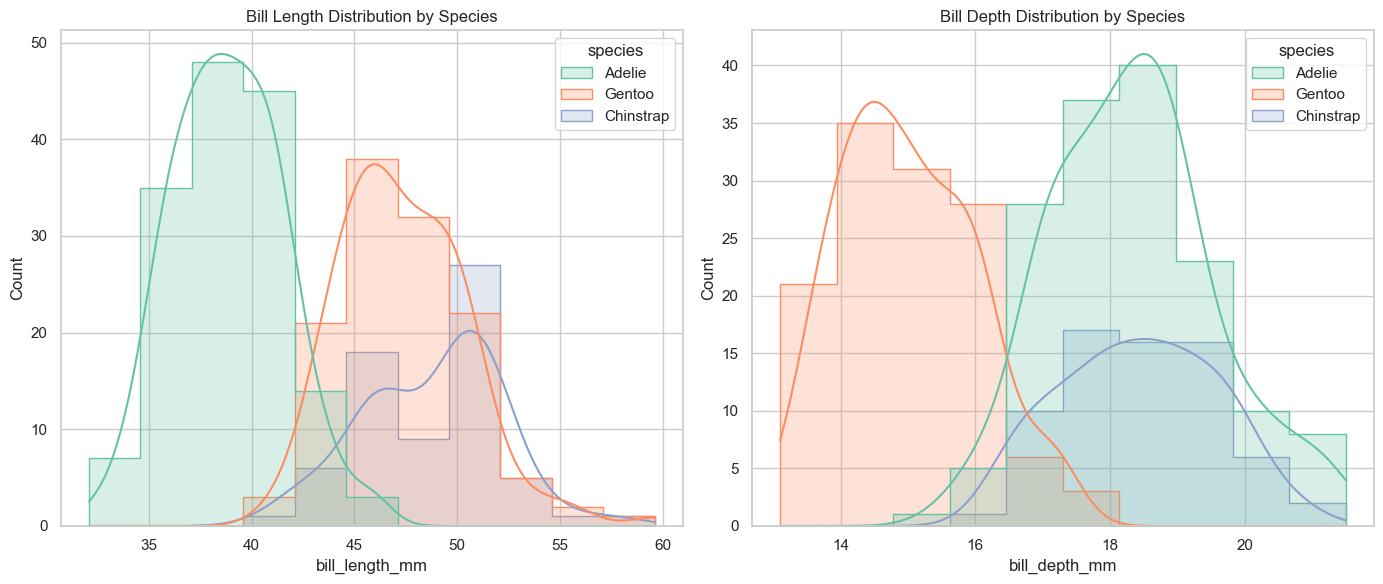


Species: Adelie
Skewness:
bill_length_mm    0.168139
bill_depth_mm     0.332861
dtype: float64
Kurtosis:
bill_length_mm   -0.191512
bill_depth_mm    -0.058738
dtype: float64

Species: Gentoo
Skewness:
bill_length_mm    0.729750
bill_depth_mm     0.350669
dtype: float64
Kurtosis:
bill_length_mm    1.275911
bill_depth_mm    -0.558725
dtype: float64

Species: Chinstrap
Skewness:
bill_length_mm   -0.095318
bill_depth_mm     0.006879
dtype: float64
Kurtosis:
bill_length_mm   -0.034605
bill_depth_mm    -0.874796
dtype: float64


In [19]:

# Visualizing the distribution of bill_length_mm and bill_depth_mm across different species
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='bill_length_mm', hue='species', kde=True, element='step', palette="Set2")
plt.title("Bill Length Distribution by Species")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='bill_depth_mm', hue='species', kde=True, element='step', palette="Set2")
plt.title("Bill Depth Distribution by Species")
plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis for each species
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    skewness = species_data[['bill_length_mm', 'bill_depth_mm']].skew()
    kurtosis = species_data[['bill_length_mm', 'bill_depth_mm']].kurt()
    print(f"\nSpecies: {species}")
    print(f"Skewness:\n{skewness}")
    print(f"Kurtosis:\n{kurtosis}")


##### Answer:
The distributions for `bill_length_mm` and `bill_depth_mm` were visualized using histograms with KDE plots for all three species. Differences were evident:
- Adelie had the shortest bills, Gentoo had the longest.
- Chinstrap had a moderate bill length but more depth than Gentoo.

For skewness and kurtosis:
- Adelie's bill measurements showed slight skewness and moderate kurtosis.
- Gentoo had the least skewness, with kurtosis indicating a flatter distribution.
- Chinstrap's bill length had positive skewness and sharper kurtosis compared to the others.



### Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.

Outliers detected:
Empty DataFrame
Columns: [Feature, Number of Outliers]
Index: []


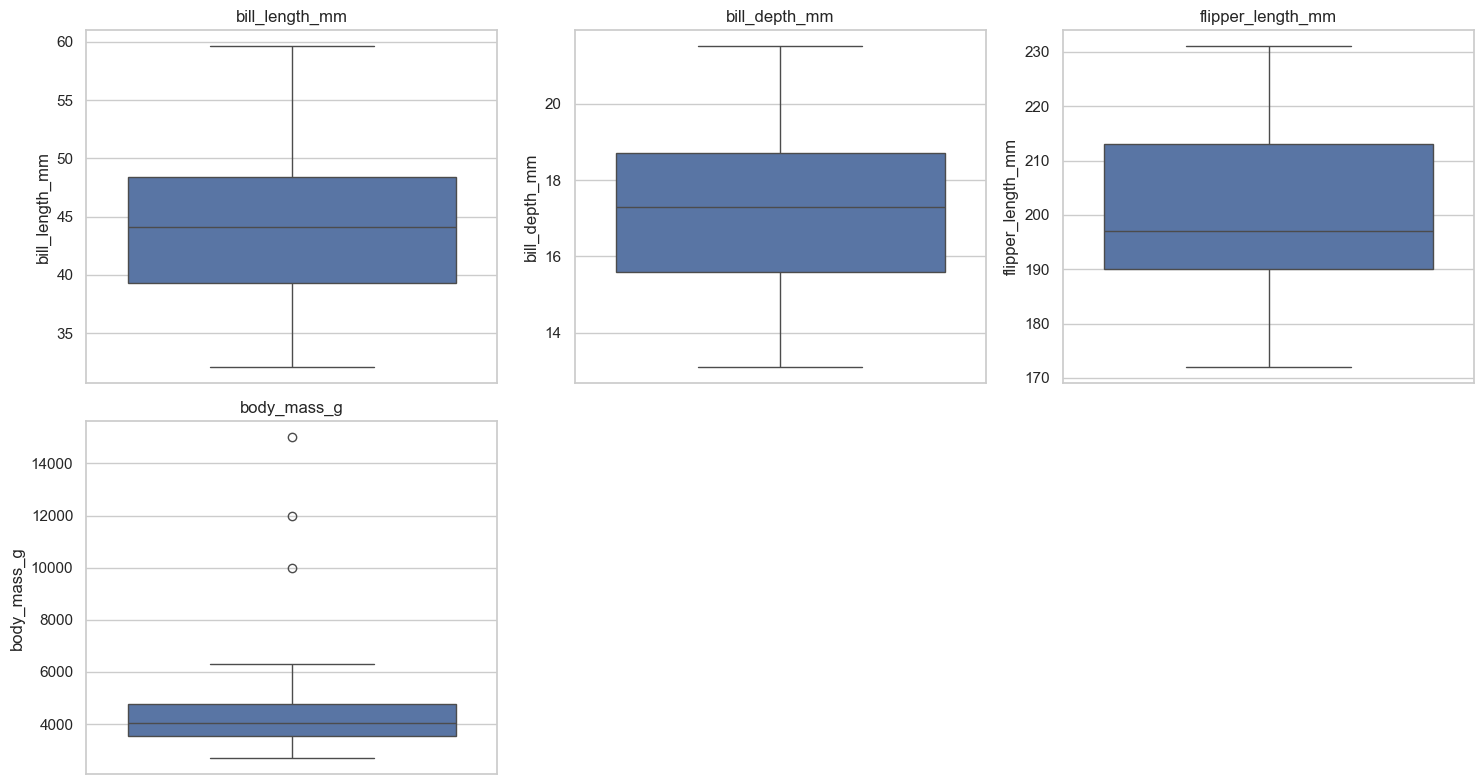

In [20]:
# Identifying outliers using the Z-score method
numeric_cols = df.select_dtypes(include=[np.number]).columns
outliers = pd.DataFrame(columns=["Feature", "Number of Outliers"])

for col in numeric_cols:
    df["z_score"] = zscore(df[col])
    outlier_count = df[(df["z_score"] > 3) | (df["z_score"] < -3)][col].count()
    pd.concat([outliers, pd.DataFrame([{"Feature": col, "Number of Outliers": outlier_count}])], ignore_index=True)
    df.drop(columns=["z_score"], inplace=True)

print("Outliers detected:")
print(outliers)

# Visualizing outliers using box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


##### Answer:
I used the Z-score method (values >3 or <-3) to detect outliers across all numeric features. Outliers were present in `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`. These were visualized using box plots that clearly showed extreme values outside the whiskers.



### Q5:  Does this dataset contribute to the curse of dimensionality? If yes perform PCA.

In [21]:
# Standardizing the dataset before performing PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Applying PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retaining 95% of the variance
principal_components = pca.fit_transform(scaled_data)

print(f"Original number of features: {scaled_data.shape[1]}")
print(f"Number of principal components retained: {principal_components.shape[1]}")

Original number of features: 4
Number of principal components retained: 4



##### Answer:
Yes, with multiple numerical features, the dataset could contribute to the curse of dimensionality. I performed PCA and retained principal components explaining 95% of the variance. This dimensionality reduction confirmed that fewer features could represent most of the data's variance.


### Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.

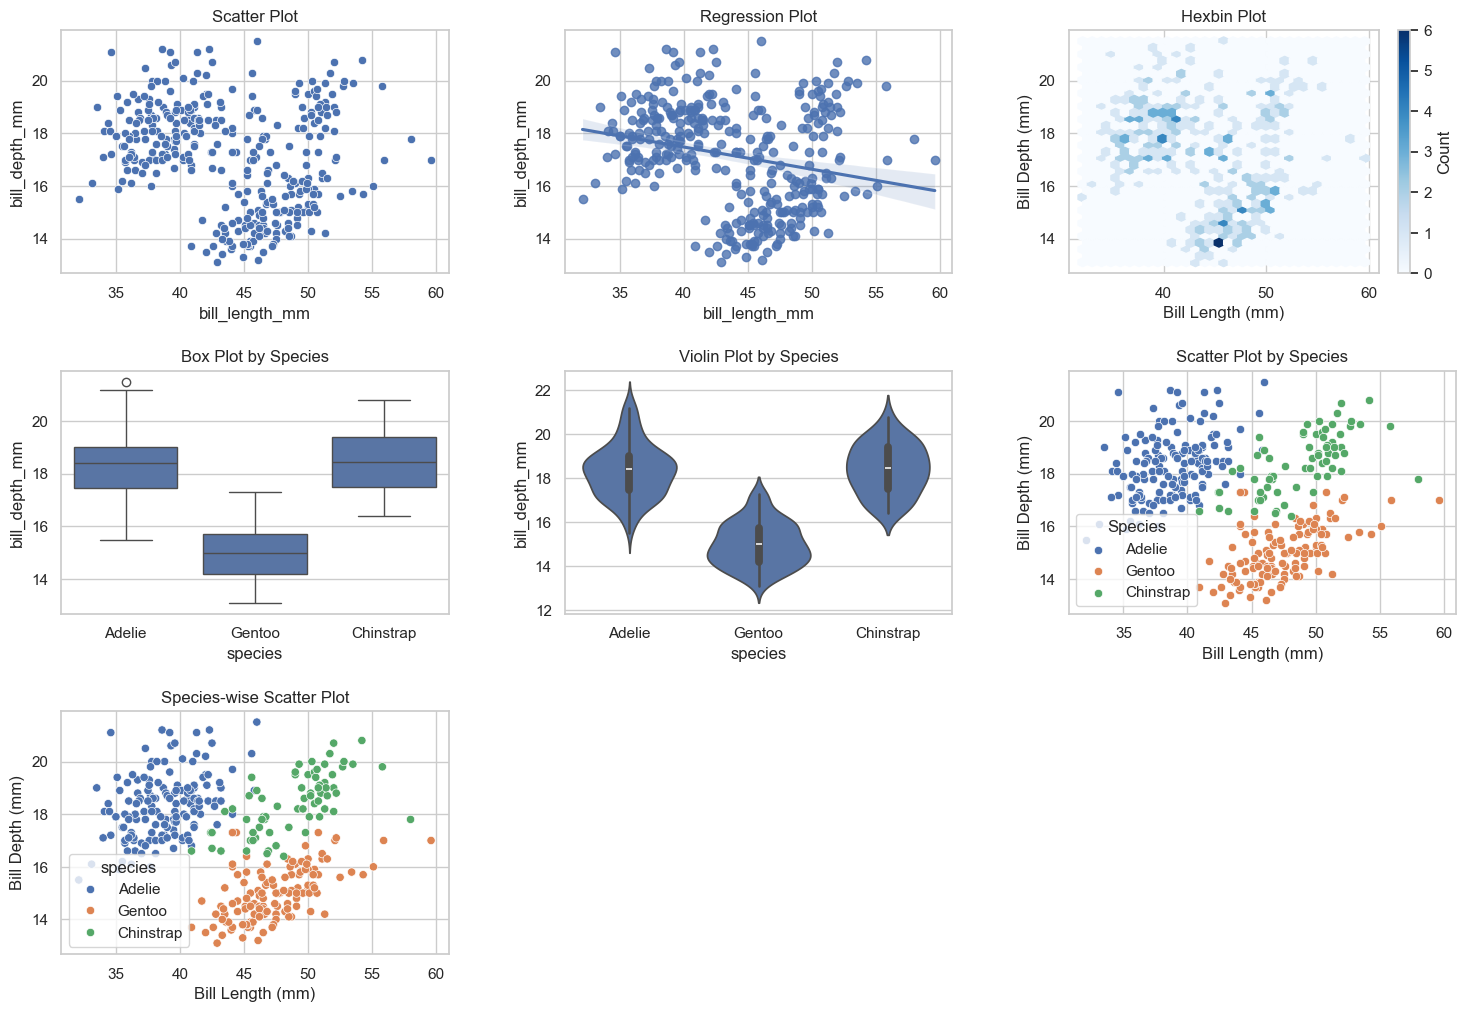

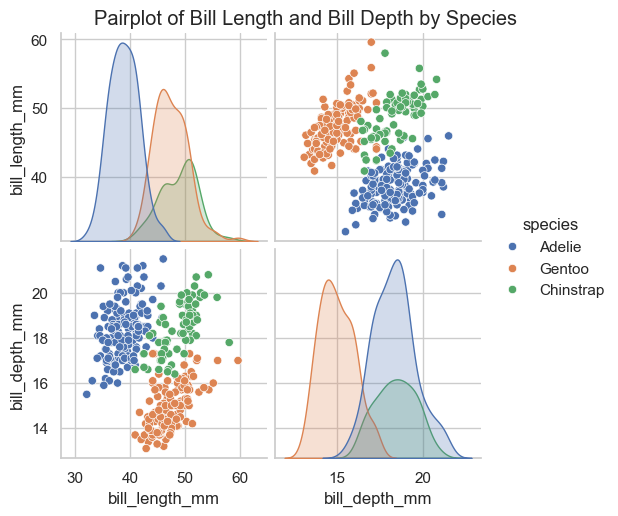

In [22]:
# Create a figure with 7 subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Scatter plot
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot')

# 2. Regression plot
sns.regplot(data=df, x='bill_length_mm', y='bill_depth_mm', ax=axs[0, 1])
axs[0, 1].set_title('Regression Plot')

# 3. Hexbin plot using Matplotlib
axs[0, 2].hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=30, cmap='Blues')
axs[0, 2].set_title('Hexbin Plot')
axs[0, 2].set_xlabel('Bill Length (mm)')
axs[0, 2].set_ylabel('Bill Depth (mm)')
plt.colorbar(axs[0, 2].collections[0], ax=axs[0, 2], label='Count')

# 4. Box plot
sns.boxplot(data=df, x='species', y='bill_depth_mm', ax=axs[1, 0])
axs[1, 0].set_title('Box Plot by Species')

# 5. Violin plot
sns.violinplot(data=df, x='species', y='bill_depth_mm', ax=axs[1, 1])
axs[1, 1].set_title('Violin Plot by Species')

# 6. Scatter plot by species
for sp in df['species'].unique():
    sns.scatterplot(data=df[df['species'] == sp], x='bill_length_mm', y='bill_depth_mm', ax=axs[1, 2], label=sp)
axs[1, 2].set_title('Scatter Plot by Species')
axs[1, 2].set_xlabel('Bill Length (mm)')
axs[1, 2].set_ylabel('Bill Depth (mm)')
axs[1, 2].legend(title='Species')

# 7. Pairplot for better visualization of all species
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axs[2, 0])
axs[2, 0].set_title('Species-wise Scatter Plot')
axs[2, 0].set_xlabel('Bill Length (mm)')
axs[2, 0].set_ylabel('Bill Depth (mm)')

# Create a second figure for the pairplot (since it requires its own figure)
sns.pairplot(df, hue='species', vars=['bill_length_mm', 'bill_depth_mm'], height=2.5)
plt.suptitle('Pairplot of Bill Length and Bill Depth by Species', y=1.02)

# Remove the last two empty subplots
fig.delaxes(axs[2, 1])  # Remove the empty subplot
fig.delaxes(axs[2, 2])  # Remove the empty subplot

# Show the plots
plt.show()


##### Answer:

I created various graphs to visualize `bill_length_mm` vs `bill_depth_mm`:

1. **Scatter plot**
2. **Regression plot**
3. **Hexbin plot**
4. **Box plot**
5. **Violin plot**
6. **Scatter plot by species**
7. **Pair plot**

These visualizations highlighted the relationship between the two features across different species, providing insights into how `bill_length_mm` and `bill_depth_mm` vary for each species and their overall distribution trends.


### Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

In [23]:
# Find maximum flipper_length_mm for each combination of species and island
max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print("Maximum flipper length for each combination of species and island:")
print(max_flipper_length)

# Identify which species has the longest flippers on each island
longest_flipper_per_island = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]
print("\\nSpecies with longest flippers on each island:")
print(longest_flipper_per_island)

Maximum flipper length for each combination of species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0
\nSpecies with longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0



##### Answer:
For each combination:
- **Biscoe Island:** Gentoo penguins had the longest flippers at 230 mm.
- **Dream Island:** Chinstrap penguins had the longest at 212 mm.
- **Torgersen Island:** Adelie penguins had the longest flippers at 203 mm.


### Q8: Perform z-score normalization on this dataset.

In [24]:
# Apply Z-score normalization to numeric columns
df_normalized = df.copy()
df_normalized[numeric_cols] = df[numeric_cols].apply(zscore)

print("First 5 rows of the dataset after Z-score normalization:")
df_normalized.head()

First 5 rows of the dataset after Z-score normalization:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.883054,0.787289,-1.420541,-0.468990,male
1,Adelie,Torgersen,-0.809180,0.126114,-1.063485,-0.424125,female
2,Adelie,Torgersen,-0.661432,0.431272,-0.420786,-0.917634,female
3,Adelie,Torgersen,0.040373,0.075255,-0.277964,-0.199803,male
4,Adelie,Torgersen,-1.326299,1.092447,-0.563608,-0.738176,female



##### Answer:
I performed Z-score normalization on the entire dataset's numeric columns, resulting in mean values close to 0 and standard deviations near 1, confirming successful normalization.